In [19]:
import warnings
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [20]:
# READ DATASET
df = pd.read_csv('./kendaraan_train_clean.csv')
df.sample(8)


,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
19434,-1.168953,1.129876,0.756800,0.903064
59552,0.085510,0.000000,-1.968949,1.380822
192106,-0.970880,-1.424972,0.756800,-0.542460
180316,0.811778,0.665358,0.226793,0.094551
196350,-0.112563,0.000000,0.756800,-0.370957
175815,-1.168953,-1.424972,0.908230,0.915314
112148,-0.838831,0.123421,0.756800,-0.346457
43435,2.198289,-1.502392,0.000000,0.645810


In [21]:
SELECTED_COLUMN=["Kanal_Penjualan", "Umur"]
df_clean = df[SELECTED_COLUMN]
df_clean.head()

,Kanal_Penjualan,Umur
0,0.756800,-0.574734
1,-1.571444,0.613705
2,0.908230,-1.168953
3,0.226793,1.273948
4,-0.454644,0.745754


In [22]:
@jit #comment this line if you can't run this file
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
    
def initCentroid(k, df):
  return {i: df[random.randint(0, len(df))] for i in range(k)}

@jit
def kmeans(k, max_iter, df):
    centroid = initCentroid(k, df)
    sum_wcss = 0
    print("="*40)
    print("INIT CENTROID")
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")
    temp_centroid = centroid.copy()
    for i in range(max_iter):
        cluster = {i: [] for i in range(k)}
        tmp = []        
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(dist))
            cluster[dist.index(min(dist))].append(x)
        sum_wcss = sum(tmp)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("="*40)
        print(f"ITERASI KE-{i+1}")
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")        
        isMatch = True
        for j in range(k):
          if (temp_centroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print(f"BERHENTI PADA ITERASI KE {i+1}")
          break
        temp_centroid = centroid.copy()
    return centroid, cluster, sum_wcss

In [23]:
NUM_K = 3
MAX_ITER = 100

In [24]:
data = df_clean.to_numpy()
centroid, cluster, _ = kmeans(NUM_K, MAX_ITER, data)

INIT CENTROID
Klaster 1: [0.22679287 0.61370482]
Klaster 2: [ 0.22679287 -0.17858751]
Klaster 3: [0.22679287 0.74575354]
ITERASI KE-1
Klaster 1: [-0.55251908  0.43825265]
Klaster 2: [ 0.41589461 -0.68163345]
Klaster 3: [-0.70765352  1.46377285]
ITERASI KE-2
Klaster 1: [-0.7550659   0.33504938]
Klaster 2: [ 0.67272373 -0.71826923]
Klaster 3: [-0.89624146  1.61453069]
ITERASI KE-3
Klaster 1: [-0.87195588  0.35298397]
Klaster 2: [ 0.66981162 -0.68636173]
Klaster 3: [-0.84064989  1.67706355]
ITERASI KE-4
Klaster 1: [-1.05926879  0.36329976]
Klaster 2: [ 0.65545176 -0.65126649]
Klaster 3: [-0.70832556  1.69654895]
ITERASI KE-5
Klaster 1: [-1.44292304  0.3675851 ]
Klaster 2: [ 0.63018616 -0.59590382]
Klaster 3: [-0.50296389  1.64099498]
ITERASI KE-6
Klaster 1: [-1.63985104  0.43868406]
Klaster 2: [ 0.62316475 -0.59285039]
Klaster 3: [-0.29857017  1.56504383]
ITERASI KE-7
Klaster 1: [-1.64493559  0.53130058]
Klaster 2: [ 0.62762492 -0.61513813]
Klaster 3: [-0.12554419  1.49100973]
ITERASI KE-

In [25]:
# membuat dataframe hasil clustering
df_cluster = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_cluster.append((c[0], c[1], key))

df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = SELECTED_COLUMN + ['Cluster']

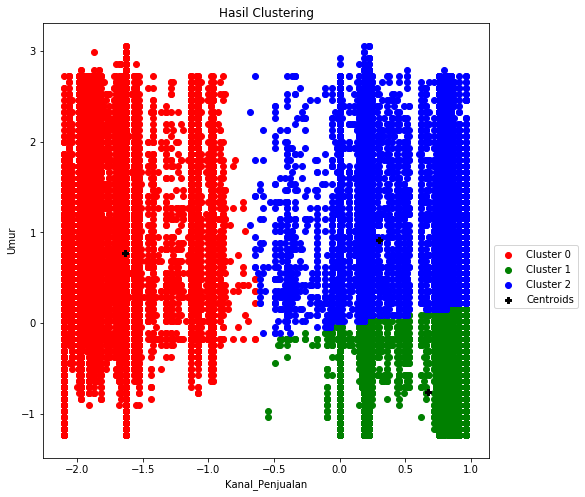

In [30]:
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(8, 8))
plt.title('Hasil Clustering')
for i in range(NUM_K):
    plt.scatter(
        df_cluster[SELECTED_COLUMN[0]][df_cluster['Cluster'] == i], 
        df_cluster[SELECTED_COLUMN[1]][df_cluster['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')
plt.xlabel(SELECTED_COLUMN[0])
plt.ylabel(SELECTED_COLUMN[1])
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

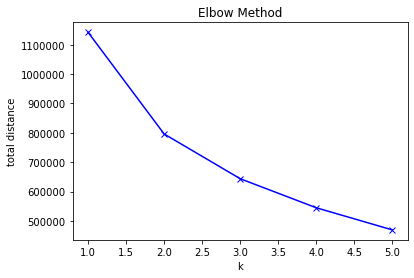

In [28]:
distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    distances.append(km.inertia_)

plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

INIT CENTROID
Klaster 1: [ 0.75679954 -0.97087984]
ITERASI KE-1
Klaster 1: [-2.53017327e-11 -1.29960035e-11]
ITERASI KE-2
Klaster 1: [-2.53017327e-11 -1.29960035e-11]
BERHENTI PADA ITERASI KE 2
INIT CENTROID
Klaster 1: [-1.6282305  0.8117779]
Klaster 2: [ 0.73787073 -1.0369042 ]
ITERASI KE-1
Klaster 1: [-1.12358158  0.97082342]
Klaster 2: [ 0.61670776 -0.53286236]
ITERASI KE-2
Klaster 1: [-1.12321307  0.97354826]
Klaster 2: [ 0.6153459  -0.53335289]
ITERASI KE-3
Klaster 1: [-1.12321307  0.97354826]
Klaster 2: [ 0.6153459  -0.53335289]
BERHENTI PADA ITERASI KE 3
INIT CENTROID
Klaster 1: [0.         0.87780226]
Klaster 2: [-1.68501692  1.53804587]
Klaster 3: [ 0.75679954 -1.16895293]
ITERASI KE-1
Klaster 1: [0.26678218 0.7326969 ]
Klaster 2: [-1.6518861   0.85108705]
Klaster 3: [ 0.67241795 -0.83072617]
ITERASI KE-2
Klaster 1: [0.30811227 0.84598179]
Klaster 2: [-1.63883747  0.7715072 ]
Klaster 3: [ 0.68656805 -0.7937962 ]
ITERASI KE-3
Klaster 1: [0.3048224  0.88576828]
Klaster 2: [-1.63

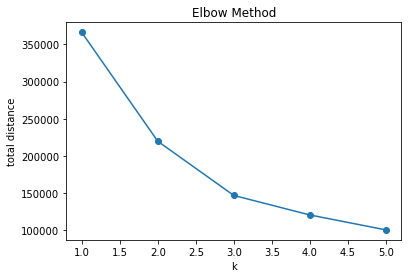

In [29]:
distances = []
cluster_all = []
K = range(1,6)
for k in K:
    _, _, w = kmeans(k,MAX_ITER,data)
    distances.append(w)

plt.plot(K, distances, marker='o')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()